In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [89]:
etf_all = pd.read_csv('stats_100_etfs.csv')
etf_all.head()

,date,open,high,low,close,volume,ticker,Clf_Target,1day_change,2day_change,3day_change,4day_change,5day_change,ewma7,ewma50,ewma200,MACD,RSI
0,2015-01-29,200.38,202.30,198.68,201.99,173585424,SPY,0.0,-1.85,0.75,3.46,2.98,4.11,202.607510,202.813380,202.823244,-0.051351,49.664254
1,2015-01-30,200.57,202.17,199.13,199.45,197729724,SPY,1.0,2.54,0.69,3.29,6.00,5.52,201.812154,202.546072,202.608549,-0.250332,44.689405
2,2015-02-02,200.05,202.03,197.86,201.92,163106969,SPY,1.0,-2.47,0.07,-1.78,0.82,3.53,201.839268,202.498240,202.566959,-0.243913,49.940725
3,2015-02-03,203.00,204.85,202.55,204.84,124212881,SPY,0.0,-2.92,-5.39,-2.85,-4.70,-2.10,202.592637,202.670737,202.697663,-0.048698,55.339046
4,2015-02-04,203.92,205.38,203.51,204.06,134306728,SPY,1.0,0.78,-2.14,-4.61,-2.07,-3.92,202.960644,202.769663,202.772444,0.051507,53.673969


In [90]:
etf_list = ['SPY','IVV','VTI','VOO','QQQ','VEA','EFA','IEFA','VWO','AGG','IJH','IEMG','IWM','IJR','VTV','IWF','IWD','VUG','BND','LQD','XLF','VNQ','VIG','EEM','GLD','VB','BSV','VO','TIP','VEU','IVW','DIA','XLK','VYM','VGT','VCSH','MDY','IWB','VCIT','XLV','IWR','XLE','DVY','USMV','EWJ','VGK','PFF','SCHF','SDY','RSP','XLY','ITOT','IVE','SCHX','HYG','SHV','VBR','EMB','SHY','VV','SCHB','XLI','BIV','VT','MBB','BNDX','IWS','VXUS','FLOT','IWO','IXUS','MINT','SCZ','PYZ','MXI','IYM','IXP','RXI','VCR','RHS','VDC','PXI','PXE','IEO','RYF','IYG','KIE','FBT','PTH','IHI','ITA','VIS','ICF','REZ','RWR','PSJ','IGV','RYU','IDU','VPU']
etf = etf_all.loc[etf_all['ticker'] == 'PYZ']



In [139]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
etf['Prediction'] = etf[['close']].shift(-forecast_out)
#print the new data set
etf

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date,open,high,low,close,volume,ticker,Clf_Target,1day_change,2day_change,3day_change,4day_change,5day_change,ewma7,ewma50,ewma200,MACD,RSI,Prediction
90447,2015-01-29,50.95,51.60,50.80,51.56,27511,PYZ,0.5,-0.51,0.32,0.60,0.10,0.90,51.600360,51.563855,51.553468,0.021225,54.751310,53.83
90448,2015-01-30,51.45,52.08,51.32,51.56,4335,PYZ,1.0,-0.00,-0.51,0.32,0.60,0.10,51.590194,51.563548,51.553884,0.016769,54.751310,53.85
90449,2015-02-02,51.74,52.03,51.50,52.03,3619,PYZ,1.0,-0.47,-0.47,-0.98,-0.15,0.13,51.700769,51.599185,51.582643,0.042784,57.926189,53.60
90450,2015-02-03,52.12,53.19,52.12,53.19,4808,PYZ,0.0,-1.16,-1.63,-1.63,-2.14,-1.31,52.074658,51.716366,51.675069,0.136669,64.539395,54.46
90451,2015-02-04,53.06,53.17,52.82,53.02,6790,PYZ,1.0,0.17,-0.99,-1.46,-1.46,-1.97,52.311745,51.809195,51.748894,0.196300,62.977116,53.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91681,2019-12-23,62.35,62.74,62.19,62.72,1938,PYZ,1.0,-0.37,-0.21,-0.59,-0.64,-0.83,62.237353,60.439858,59.472861,0.649253,65.434042,NaN
91682,2019-12-24,62.94,62.94,62.75,62.83,1419,PYZ,1.0,-0.11,-0.48,-0.32,-0.70,-0.75,62.385514,60.533589,59.506266,0.673323,66.206781,NaN
91683,2019-12-26,62.95,62.98,62.95,62.98,382,PYZ,0.0,-0.15,-0.26,-0.63,-0.47,-0.85,62.534136,60.629526,59.540830,0.696474,67.280939,NaN
91684,2019-12-27,63.12,63.12,62.63,62.63,782,PYZ,0.0,0.35,0.20,0.09,-0.28,-0.12,62.558102,60.707976,59.571568,0.678754,62.304491,NaN


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error


# X = etf[['5day_change', 'ewma7', 'ewma50', 'ewma200']]
# y = etf[['close']]
# print(X.shape, y.shape)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# # Create a StandardScater model and fit it to the training data

# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)

# training_score = model.score(X_train_scaled, y_train_scaled)
# testing_score = model.score(X_test_scaled, y_test_scaled)

# ### END SOLUTION 

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")

# predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()

# predictions = pd.DataFrame(predictions)
# actual = pd.DataFrame(y_test_scaled)
# # dataset = pd.DataFrame({'predictions': predictions, 'actual': actual}, columns=['Predictions', 'Actuals'])
# pred_ytest = pd.merge(predictions, actual, left_index=True, right_index=True)
# pred_ytest
# # pd.DataFrame({"Predicted": predictions, "Actual":actual, "Error": predictions - actual})

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

# # LASSO model
# # Note: Use an alpha of .01 when creating the model for this activity
# from sklearn.linear_model import Lasso

# ### BEGIN SOLUTION
# lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

# predictions = lasso.predict(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = lasso.score(X_test_scaled, y_test_scaled)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

# # Ridge model
# # Note: Use an alpha of .01 when creating the model for this activity
# from sklearn.linear_model import Ridge

# ### BEGIN SOLUTION
# ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

# predictions = ridge.predict(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = ridge.score(X_test_scaled, y_test_scaled)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

# # ElasticNet model
# # Note: Use an alpha of .01 when creating the model for this activity
# from sklearn.linear_model import ElasticNet

# ### BEGIN SOLUTION
# elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

# predictions = elasticnet.predict(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = elasticnet.score(X_test_scaled, y_test_scaled)
# ### END SOLUTION

# print(f"MSE: {MSE}, R2: {r2}")

In [140]:
X = etf[['Predictions']]
y = etf[['close']]
print(X.shape, y.shape)

KeyError: "None of [Index(['Predictions'], dtype='object')] are in the [columns]"

In [133]:
#  from sklearn.datasets.samples_generator import make_blobs
# X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
# plt.show()

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [135]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [136]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

y_test_scaled.shape

(310, 1)

In [137]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9003299850708347
Testing Score: 0.8956908407381077


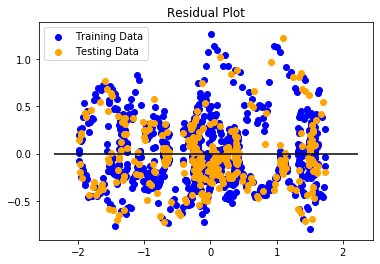

In [138]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [ ]:
# plt.scatter(X, y, c='blue')
# plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [98]:
predictions = pd.DataFrame(predictions)
actual = pd.DataFrame(y_test_scaled)
# dataset = pd.DataFrame({'predictions': predictions, 'actual': actual}, columns=['Predictions', 'Actuals'])
pred_ytest = pd.merge(predictions, actual, left_index=True, right_index=True)
pred_ytest
# pd.DataFrame({"Predicted": predictions, "Actual":actual, "Error": predictions - actual})

,0_x,0_y
0,-0.295457,-0.271463
1,-2.230634,-2.259591
2,-1.006618,-0.964492
3,0.613576,0.578942
4,-0.604882,-0.639635
...,...,...
305,0.191918,0.181894
306,1.486144,1.632924
307,-0.391441,-0.366754
308,1.516755,1.520307


In [75]:
pd.DataFrame(predictions)
# y_test_scaled.shape

,0
0,-0.295457
1,-2.230634
2,-1.006618
3,0.613576
4,-0.604882
...,...
305,0.191918
306,1.486144
307,-0.391441
308,1.516755


In [32]:
# new_data = np.array([[0.5, 0.5]])
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [34]:
# new_data = np.array([[0.5, 0.5]])
# predictions = model.predict(new_data)
# print("Classes are either 0 (orange) or 1 (blue)")
# print(f"The new point was classified as: {predictions}")

In [47]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9642168816438353, R2: 0.07268242927524282


In [48]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9643316506268238, R2: 0.07257205235016972


In [49]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9642168749212935, R2: 0.0726824357405218


In [26]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5326003169631558, R2: 0.4128704231763558


In [29]:
# #from 01-07

# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["fund_sharpe_ratio_3years"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)
# # line13: ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["fund_sharpe_ratio_3years"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [33]:
# From 2-03
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(etf.data, etf.target)

AttributeError: 'DataFrame' object has no attribute 'data'